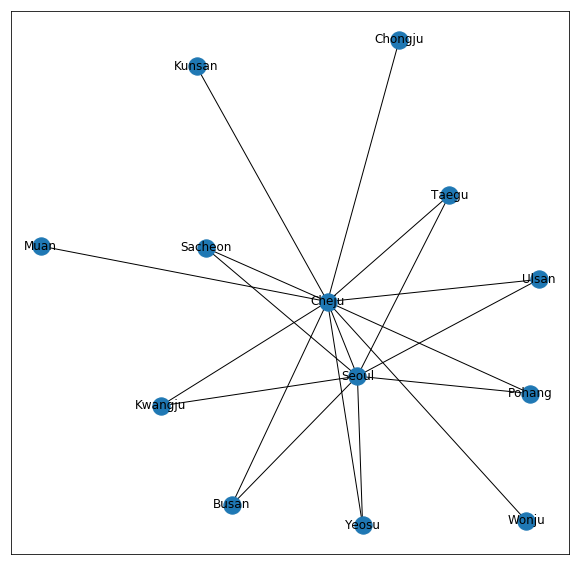

In [35]:
def graph_visualization(country):
    
    # import needed libraries
    import pandas as pd
    import networkx as nx
    import matplotlib.pyplot as plt
    
    # retrieve the data from the open source 
    # - https://raw.githubusercontent.com/jpatokal/openflights/master/data
    airport_cols = ['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude',
                    'Altitude', 'Timezone', 'DST', 'Tz database time zone', 'Type', 'Source']
    airports = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat',
                            names = airport_cols, index_col = 0)

    route_cols = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID',
                  'Destination Airport', 'Destination Airport ID', 'Codeshare', 'Stops', 'Equipment']
    routes = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat',
                            names = route_cols)
    routes['Source Airport ID'] = pd.to_numeric(routes['Source Airport ID'].astype(str), 'coerce')
    routes['Destination Airport ID'] = pd.to_numeric(routes['Destination Airport ID'].astype(str), 'coerce')
    routes = routes.dropna(subset=['Source Airport ID', 'Destination Airport ID']) 
    
    # retrieve a list of cities and their IATAs for the choosen city
    airports = airports[(airports.Country == country)][['City', 'IATA']]
    airport_idx = airports.index.values
    
    # search the routes of the choosen city only
    routes = routes[(routes['Source Airport ID'].isin(airport_idx)) &
                         (routes['Destination Airport ID'].isin(airport_idx))]
    routes["Source City"] = ""
    routes["Destination City"] = ""

    # add city names that are corresponding to their IATAs
    for row in airports.iterrows():
        city = row[1][0]
        iata = row[1][1]

        source = routes[(routes['Source Airport'] == iata)]
        dest = routes[(routes['Destination Airport'] == iata)]

        routes.loc[source.index.values, "Source City"] = city
        routes.loc[dest.index.values, "Destination City"] = city

    routes =  pd.DataFrame(routes.groupby(['Source City', 'Destination City']).size()
                           .reset_index(name = 'Number of Edges'))
    # print(routes)

    # create a graph
    graph = nx.from_pandas_edgelist(routes, source ='Source City', target ='Destination City',
                            edge_attr ='Number of Edges', create_using = nx.Graph())

    plt.figure(figsize = (10, 10))
    nx.draw_networkx(graph)
    file = country + '.png'
    plt.savefig(file, format = "png")
    plt.show()
    
graph_visualization('South Korea')